# Lab03 - Image Segmentation

In [1]:
%matplotlib inline
import numpy as np
import cv2

from PIL import Image

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

from scipy import ndimage as ndi
from sklearn.cluster import MeanShift
from skimage.morphology import watershed
from skimage.feature import peak_local_max

## Question 1

<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=100x77 at 0x7FC7271A9550>


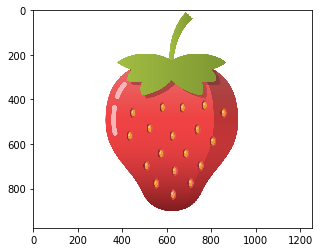

In [14]:
strawberry = Image.open("./pics/strawberry.png")
plt.imshow(strawberry)
strawberry.thumbnail((100,100))

In [12]:
strawberry_b = strawberry[:,:,0].flatten()
strawberry_g = strawberry[:,:,1].flatten()
strawberry_r = strawberry[:,:,2].flatten()

strawberry_shape = np.shape(strawberry[:,:,0])

strawberry_flattened = np.stack([strawberry_b,
                                strawberry_g,
                                strawberry_r], axis=1)

TypeError: 'PngImageFile' object is not subscriptable

### MeanShift Clustering

In [ ]:
ms_clf = MeanShift(bin_seeding=True)
ms_labels = ms_clf.fit_predict(strawberry_flattened)

In [ ]:
strawberry_ms_segmented = np.reshape(ms_labels, strawberry_shape)
plt.imshow(strawberry_ms_segmented)
plt.axis('off')

### Watershed Segmentation

[[37.01351105 36.01388621 35.0142828  ... 40.31128874 41.18252056
  42.05948169]
 [37.         36.         35.         ... 39.8246155  40.70626487
  41.59326869]
 [37.         36.         35.         ... 39.35733731 40.24922359
  41.14608122]
 ...
 [42.42640687 41.43669871 40.44749683 ... 40.60788101 41.40048309
  42.20189569]
 [42.57933771 41.59326869 40.60788101 ... 41.23105626 42.01190308
  42.80186912]
 [42.75511665 41.77319715 40.79215611 ... 41.86884283 42.63801121
  43.41658669]]


(-0.5, 125.5, 97.5, -0.5)

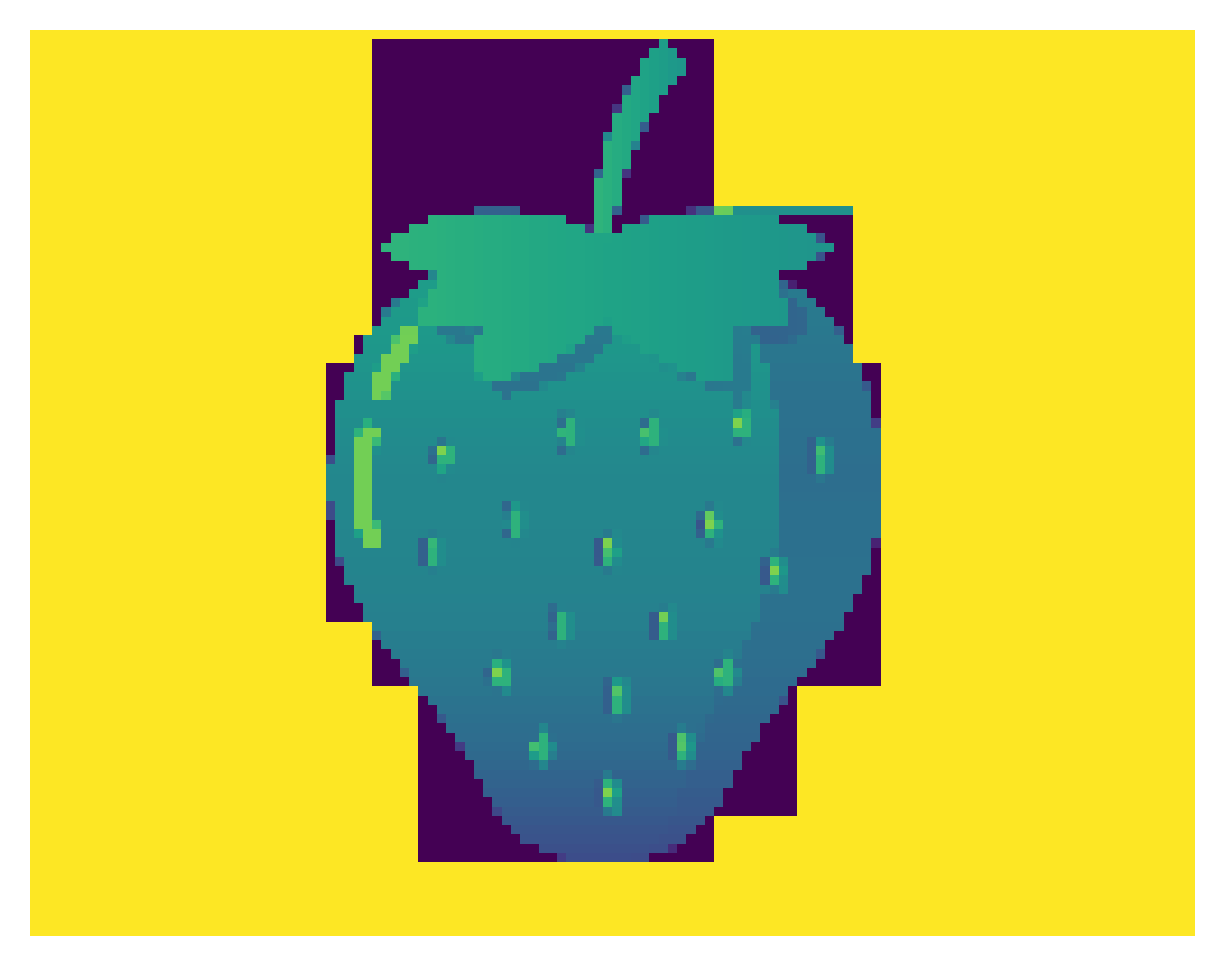

In [93]:
# convert to grayscale
strawberry_gray = cv2.cvtColor(strawberry, cv2.COLOR_BGR2GRAY)

# calculate the distance transform
strawberry_dist = ndi.distance_transform_edt(strawberry_gray)
print(strawberry_dist)
plt.imshow(strawberry_gray)
plt.axis('off')

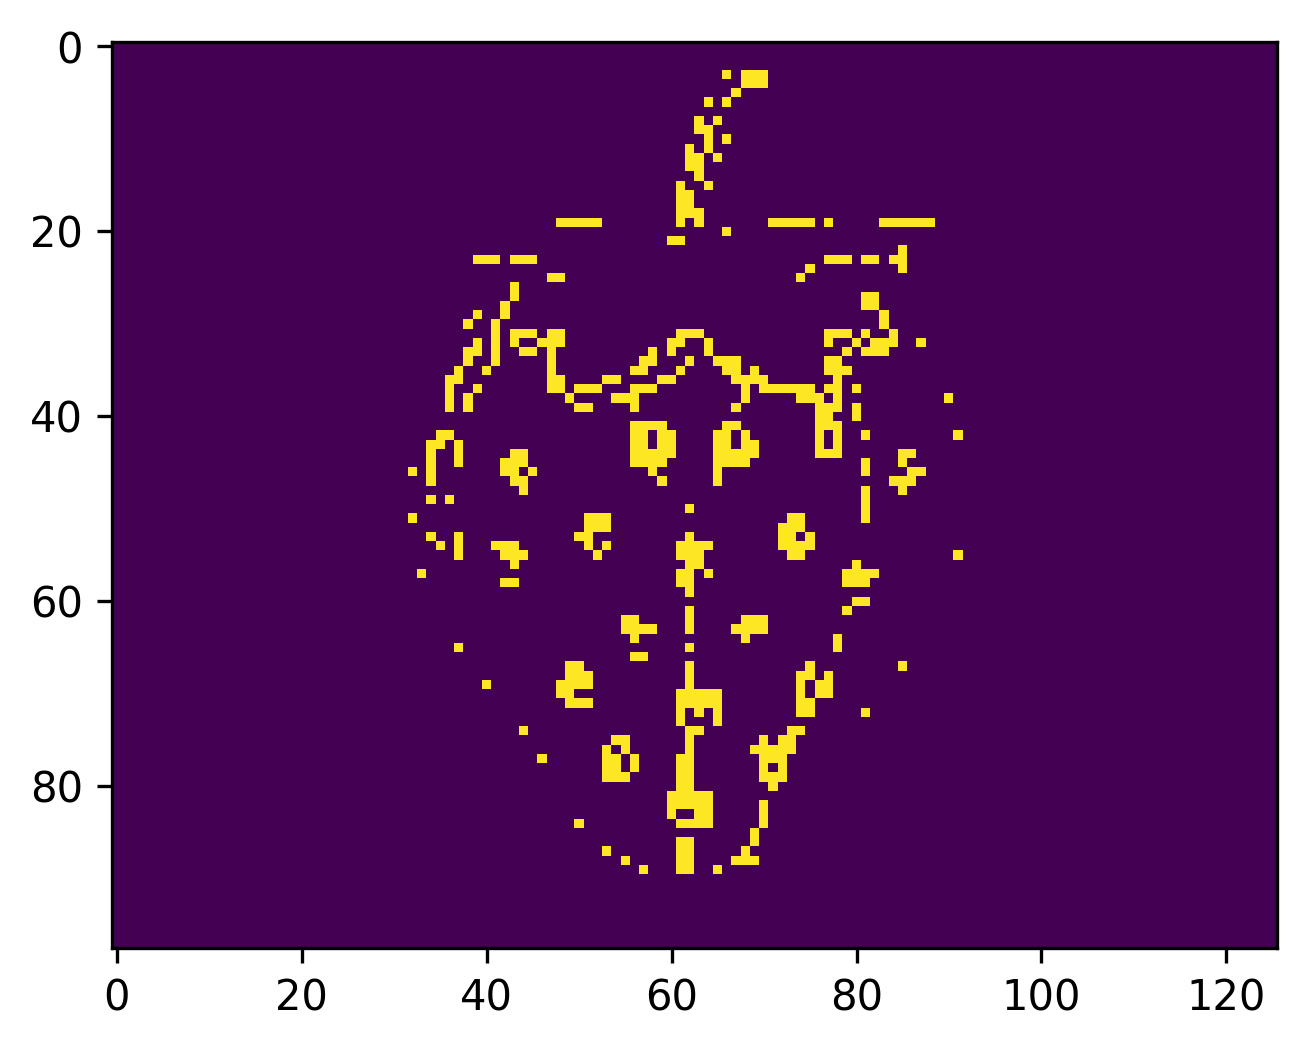

In [94]:
# generate the watershed markers
local_maxima = peak_local_max(strawberry_dist, indices=False, footprint=np.ones((4,4)), labels=strawberry_gray)
plt.imshow(local_maxima)

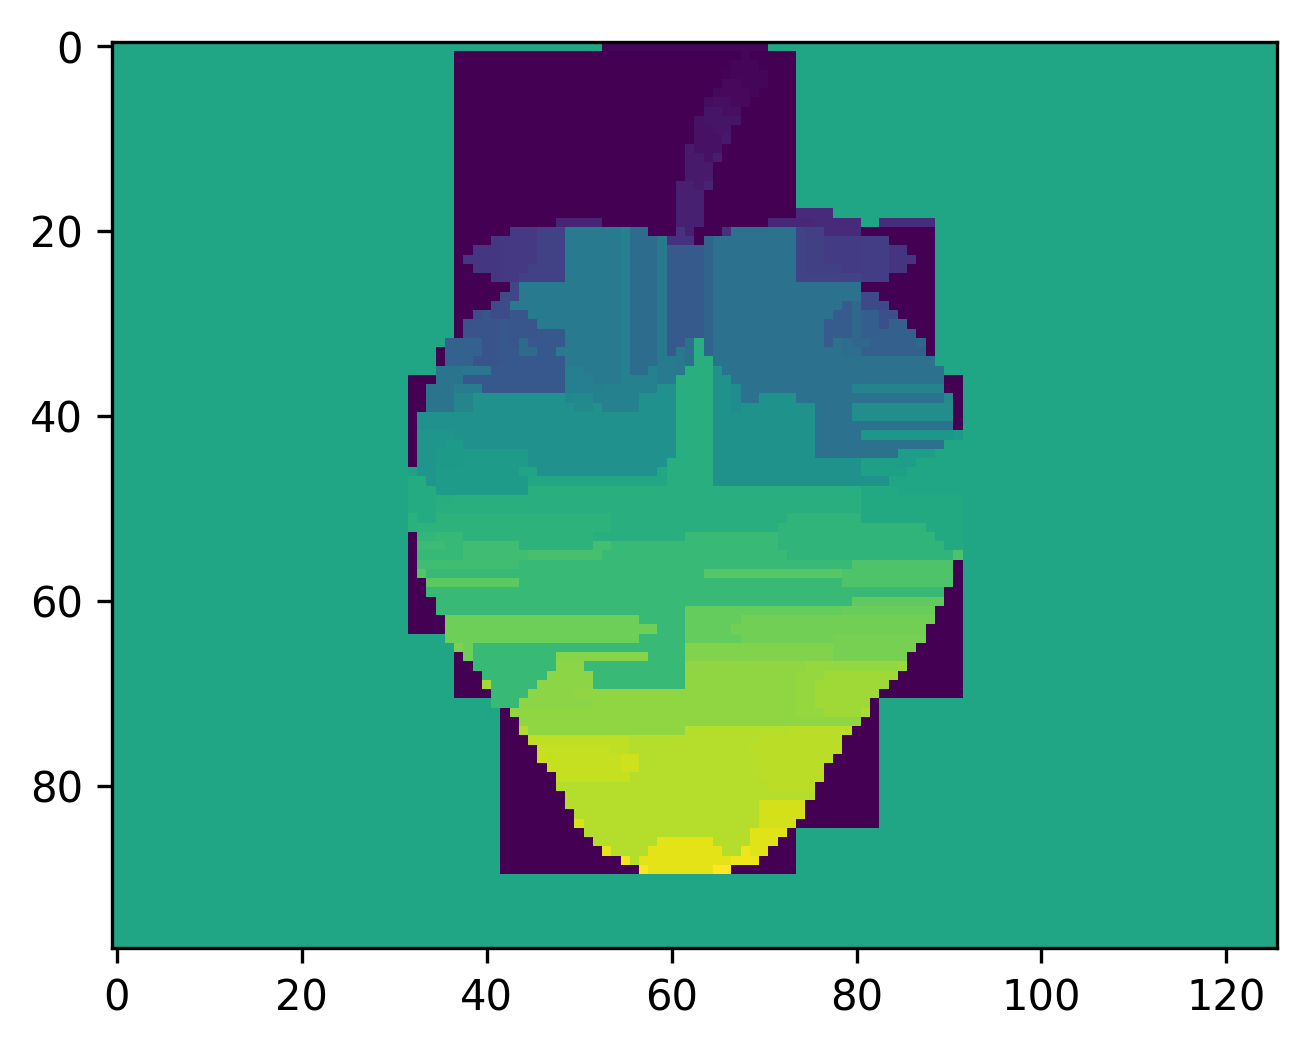

In [95]:
markers = ndi.label(local_maxima)[0]
strawberry_watershed_segmented = watershed(-strawberry_dist, markers, mask=strawberry_gray)
plt.imshow(strawberry_watershed_segmented)

In [96]:
def plot_three_images(figure_title, image1, label1,
                      image2, label2, image3, label3):
    fig = plt.figure()
    fig.suptitle(figure_title)

    # Display the first image
    fig.add_subplot(1, 3, 1)
    plt.imshow(image1)
    plt.axis('off')
    plt.title(label1)

    # Display the second image
    fig.add_subplot(1, 3, 2)
    plt.imshow(image2)
    plt.axis('off')
    plt.title(label2)

    # Display the third image
    fig.add_subplot(1, 3, 3)
    plt.imshow(image3)
    plt.axis('off')
    plt.title(label3)

    plt.show()

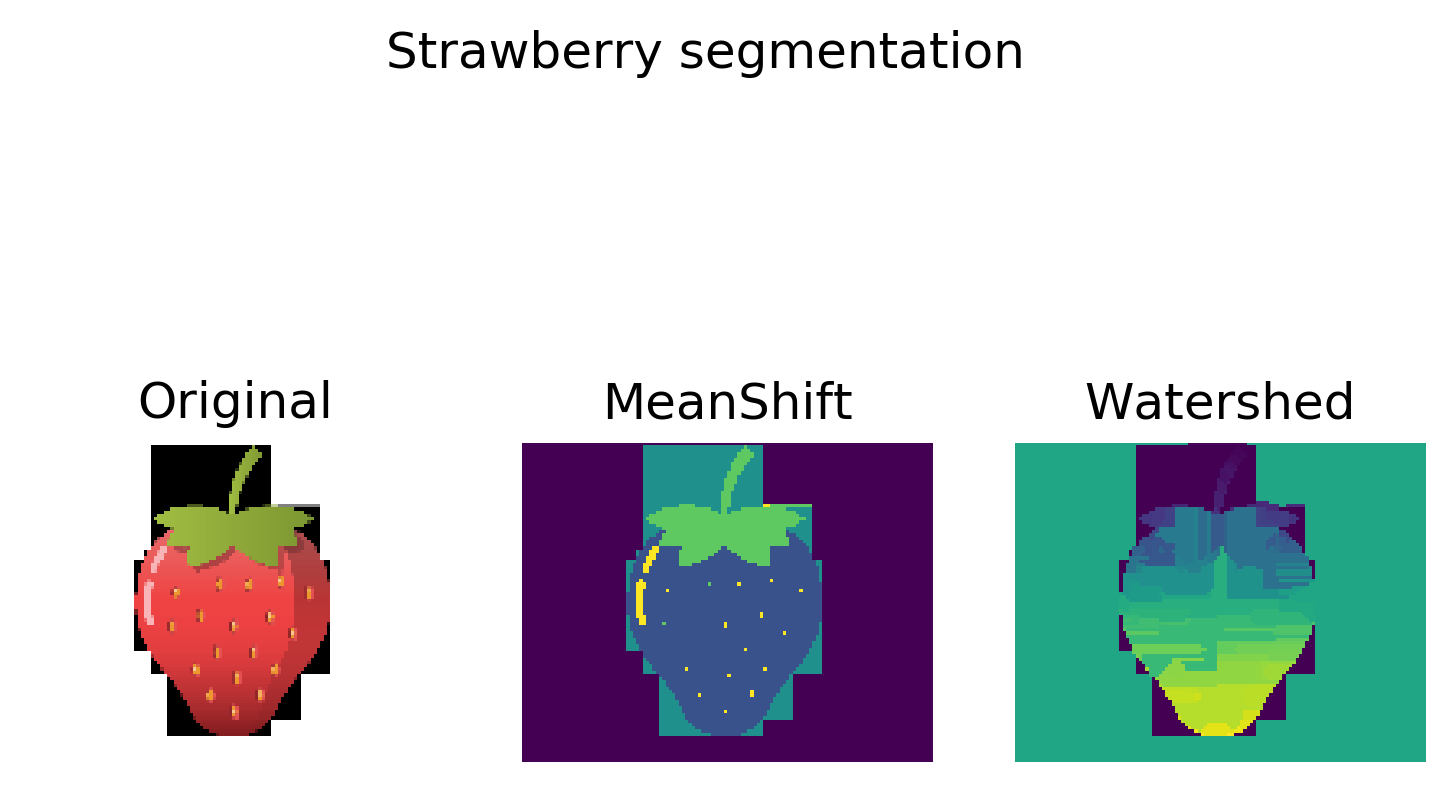

In [97]:
plot_three_images("Strawberry segmentation", cv2.cvtColor(strawberry_orig,cv2.COLOR_BGR2RGB), "Original",
                 strawberry_ms_segmented, "MeanShift",
                 strawberry_watershed_segmented, "Watershed")